Weight updates: 2


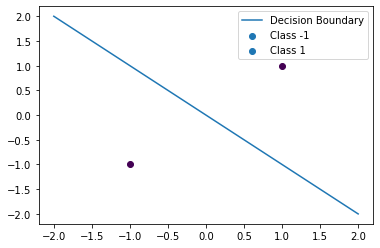

In [1]:
############################################ NOT GATE ###################################################################

import numpy as np
import matplotlib.pyplot as plt

def predict(x, w, b):
    return np.sign(x*w + b)

def train(x, y, w, b, learning_rate):
    weight_updates = 0
    while True:
        mistakes = 0
        for i in range(len(x)):
            prediction = predict(x[i], w, b)
            if np.any(prediction != y[i]):
                w += learning_rate * x[i] * y[i]
                b += learning_rate * y[i]
                weight_updates += 1
                mistakes += 1
        if mistakes == 0:
            break
    return w, b, weight_updates

def plot_decision_boundary(w, b, x, y):
    x_vals = [-2, 2]
    y_vals = [-(w[0] * x + b) / w[1] for x in x_vals]
    plt.plot(x_vals, y_vals, '-', label='Decision Boundary')

x = np.array([[-1],[1]])
y = np.array([1,-1])
w = np.array([0,0])
b = 0
learning_rate = 1

w, b, weight_updates = train(x, y, w, b, learning_rate)
print("Weight updates:", weight_updates)

plt.scatter(x[0], x[0], c=y[0], label='Class -1')
plt.scatter(x[1], x[1], c=y[1], label='Class 1')
plot_decision_boundary(w, b, x, y)
plt.legend()
plt.show()



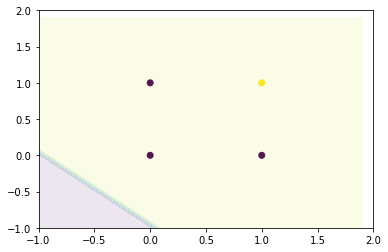

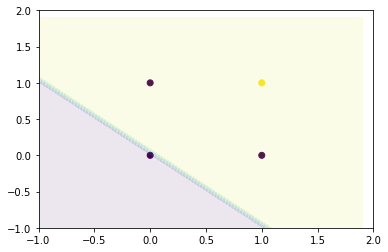

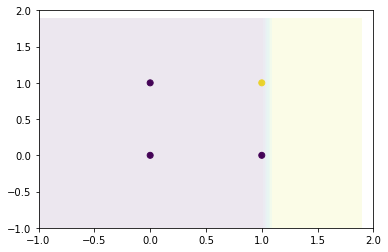

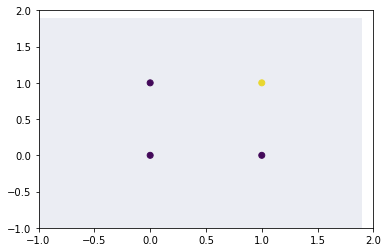

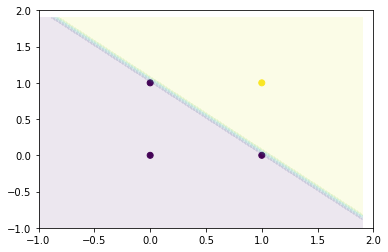

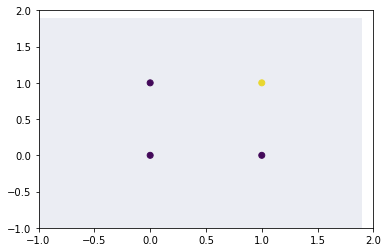

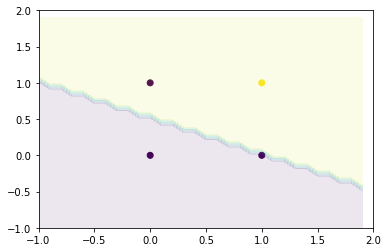

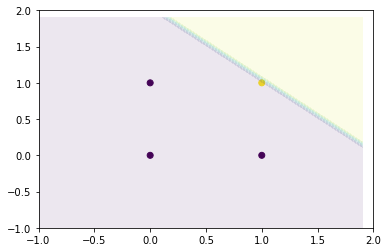

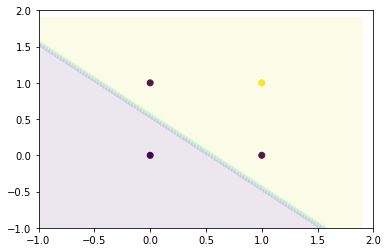

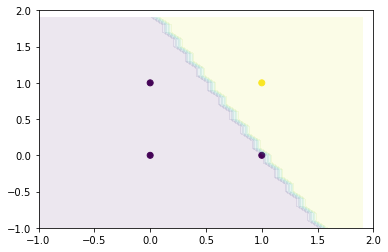

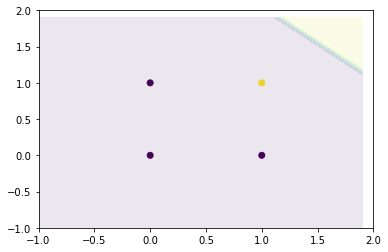

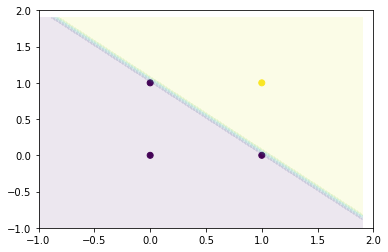

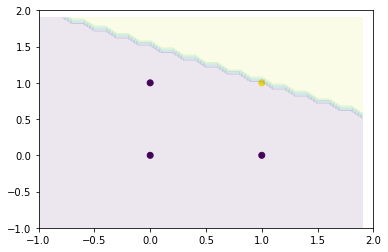

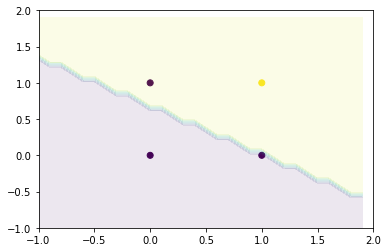

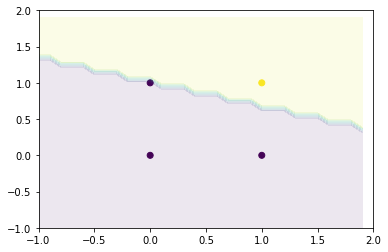

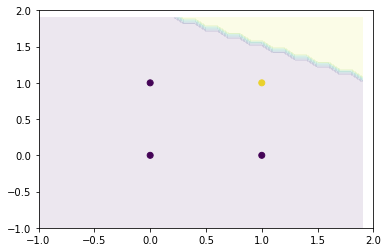

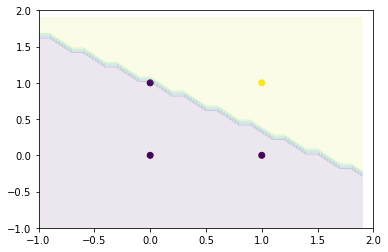

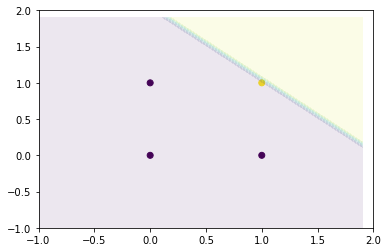

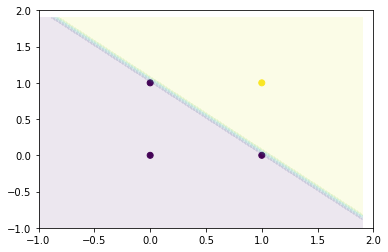

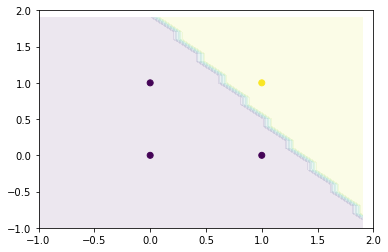

Number of steps necessary for convergence:  20
Best weight vector for AND function:  [3. 2.]
Best bias for AND function:  -4.0


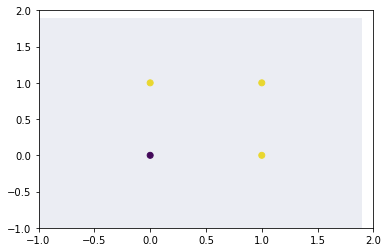

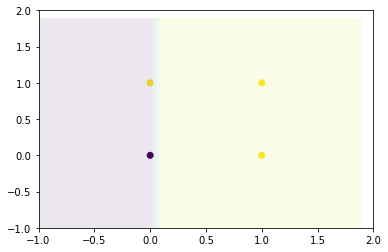

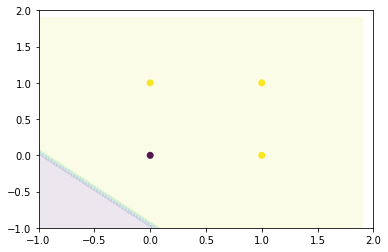

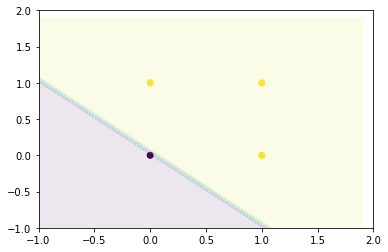

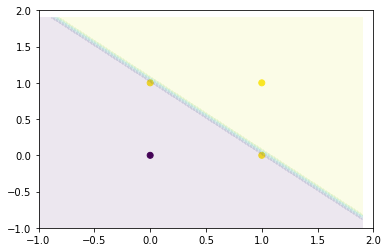

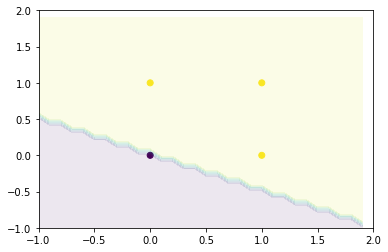

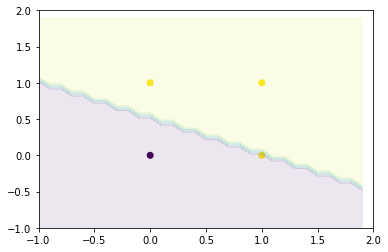

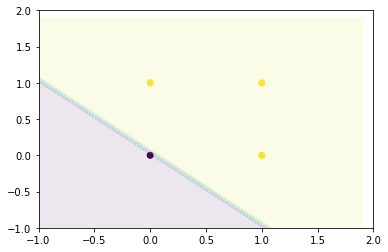

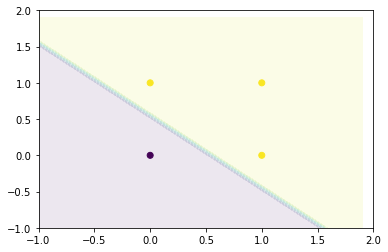

Number of steps necessary for convergence:  9
Best weight vector for OR function:  [2. 2.]
Best bias for OR function:  -1.0


<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

class Perceptron:
    def __init__(self):
        self.weights = None
        self.bias = None

    ########################################### for optimized code ###############################################
    def train_pocket(self, X, y, max_steps=100):
        n_features = X.shape[1]
        weights = np.zeros(n_features)
        bias = 0.0
        best_weights = weights.copy()
        best_bias = bias
        best_accuracy = 0
        lr = 1
        steps = 0
        for step in range(max_steps):
            shuffle = np.random.permutation(len(X))
            X = X[shuffle]
            y = y[shuffle]
            for i, x in enumerate(X):
                dot = np.dot(weights, x) + bias
                if y[i] * dot <= 0:
                    weights = weights + lr * y[i] * x
                    bias = bias + lr * y[i]
                    steps += 1
                    accuracy = sum(np.sign(np.dot(X, weights) + bias) == y) / len(X)
                    if accuracy > best_accuracy:
                        best_weights = weights.copy()
                        best_bias = bias
                        best_accuracy = accuracy
                    # Plot the decision boundary at every weight update
                    plt.scatter(X[:, 0], X[:, 1], c=y)
                    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
                    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
                    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                        np.arange(y_min, y_max, 0.1))
                    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
                    Z = np.sign(Z)
                    Z = Z.reshape(xx.shape)
                    plt.contourf(xx, yy, Z, alpha=0.1)
                    plt.xlim(x_min, x_max)
                    plt.ylim(y_min, y_max)
                    plt.show()
                    plt.clf()

        print("Number of steps necessary for convergence: ", steps)                    
        self.weights_ = best_weights
        self.bias_ = best_bias
        return best_weights, best_bias

# Define AND function
def AND(x1, x2):
    return int(x1 and x2)

# Define OR function
def OR(x1, x2):
    return int(x1 or x2)

# Define NOT function
def NOT(x1):
    return int(not x1)

# Generate training data for AND function
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([-1, -1, -1, 1])

# Train pocket algorithm on AND function
perceptron1 = Perceptron()
perceptron2 = Perceptron()
best_weights, best_bias = perceptron1.train_pocket(X_and, y_and)
print("Best weight vector for AND function: ", best_weights)
print("Best bias for AND function: ", best_bias)

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([-1, 1, 1, 1])

# Train pocket algorithm on OR function
best_weights1, best_bias1 = perceptron2.train_pocket(X_or, y_or)
print("Best weight vector for OR function: ", best_weights1)
print("Best bias for OR function: ", best_bias1)

with open("and.pickle", "wb") as file1:
    pickle.dump(perceptron1, file1)
    
with open("model3.pickle", "wb") as file2:
    pickle.dump(perceptron2, file2)
    


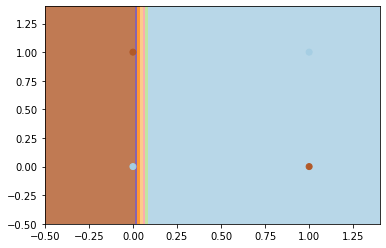

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features + 1)

    def predict(self, x):
        x = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x)
        return activation_function(weighted_sum)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i, x in enumerate(X):
                prediction = self.predict(x)
                error = y[i] - prediction
                self.weights += error * np.insert(x, 0, 1)

# Define the XOR function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train the perceptron
perceptron = Perceptron(num_features=2)
perceptron.train(X, y, epochs=10)

# Plot the decision boundary at each step
fig, ax = plt.subplots()

x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))

Z = np.array([perceptron.predict(point) for point in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [ ]:
import numpy as np

def activation_function(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features + 1)

    def predict(self, x):
        x = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x)
        return activation_function(weighted_sum)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i, x in enumerate(X):
                prediction = self.predict(x)
                error = y[i] - prediction
                self.weights += error * np.insert(x, 0, 1)

# Define the XOR function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train the perceptron
perceptron = Perceptron(num_features=2)
perceptron.train(X, y, epochs=10)

# Print the decision boundary
for x1 in np.arange(0, 1.1, 0.1):
    for x2 in np.arange(0, 1.1, 0.1):
        prediction = perceptron.predict([x1, x2])
        print(f"({x1}, {x2}) -> {prediction}")


(0.0, 0.0) -> 1
(0.0, 0.1) -> 1
(0.0, 0.2) -> 1
(0.0, 0.30000000000000004) -> 1
(0.0, 0.4) -> 1
(0.0, 0.5) -> 1
(0.0, 0.6000000000000001) -> 1
(0.0, 0.7000000000000001) -> 1
(0.0, 0.8) -> 1
(0.0, 0.9) -> 1
(0.0, 1.0) -> 1
(0.1, 0.0) -> 0
(0.1, 0.1) -> 0
(0.1, 0.2) -> 0
(0.1, 0.30000000000000004) -> 0
(0.1, 0.4) -> 0
(0.1, 0.5) -> 0
(0.1, 0.6000000000000001) -> 0
(0.1, 0.7000000000000001) -> 0
(0.1, 0.8) -> 0
(0.1, 0.9) -> 0
(0.1, 1.0) -> 0
(0.2, 0.0) -> 0
(0.2, 0.1) -> 0
(0.2, 0.2) -> 0
(0.2, 0.30000000000000004) -> 0
(0.2, 0.4) -> 0
(0.2, 0.5) -> 0
(0.2, 0.6000000000000001) -> 0
(0.2, 0.7000000000000001) -> 0
(0.2, 0.8) -> 0
(0.2, 0.9) -> 0
(0.2, 1.0) -> 0
(0.30000000000000004, 0.0) -> 0
(0.30000000000000004, 0.1) -> 0
(0.30000000000000004, 0.2) -> 0
(0.30000000000000004, 0.30000000000000004) -> 0
(0.30000000000000004, 0.4) -> 0
(0.30000000000000004, 0.5) -> 0
(0.30000000000000004, 0.6000000000000001) -> 0
(0.30000000000000004, 0.7000000000000001) -> 0
(0.30000000000000004, 0.8) -> 0
